In [2]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neural_network
import sklearn.pipeline
import sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer

## Loading Data into Lists

In [3]:
# Read in training and testing data
x_train_df = pd.read_csv('data_reviews/x_train.csv')
x_test_df = pd.read_csv('data_reviews/x_test.csv')
y_train_df = pd.read_csv('data_reviews/y_train.csv')
x_tr_list_of_sentences_N = x_train_df['text'].values.tolist()
x_te_list_of_sentences_M = x_test_df['text'].values.tolist()
y_tr_true_N = y_train_df['is_positive_sentiment'].values.tolist()
assert len(x_tr_list_of_sentences_N) == len(y_tr_true_N)
N = len(x_tr_list_of_sentences_N)
M = len(x_te_list_of_sentences_M)

# Split into company specific reviews
x_tr_amazon_800 = x_tr_list_of_sentences_N[:800]
x_tr_imdb_800 = x_tr_list_of_sentences_N[800:1600]
x_tr_yelp_800 = x_tr_list_of_sentences_N[-800:]

# print(x_tr_yelp_800[0])

x_te_amazon_200 =  x_te_list_of_sentences_M[:200]
x_te_imdb_200 = x_te_list_of_sentences_M[200:400]
x_te_yelp_200 = x_te_list_of_sentences_M[-200:]

y_tr_true_amazon_800 = y_tr_true_N[:800]
y_tr_true_imdb_800 = y_tr_true_N[800:1600]
y_tr_true_yelp_800 = y_tr_true_N[-800:]



print(N)
print(M)
print(x_tr_list_of_sentences_N)
print(y_tr_true_N)

2400
600
['Oh and I forgot to also mention the weird color effect it has on your phone.', "THAT one didn't work either.", 'Waste of 13 bucks.', 'Product is useless, since it does not have enough charging current to charge the 2 cellphones I was planning to use it with.', 'None of the three sizes they sent with the headset would stay in my ears.', 'Worst customer service.', 'The Ngage is still lacking in earbuds.', 'It always cuts out and makes a beep beep beep sound then says signal failed.', 'the only VERY DISAPPOINTING thing was there was NO SPEAKERPHONE!!!!', 'Very disappointed in AccessoryOne.', 'Basically the service was very bad.', 'Bad Choice.', 'The only thing that disappoint me is the infra red port (irda).', 'horrible, had to switch 3 times.', 'It feels poorly constructed, the menus are difficult to navigate, and the buttons are so recessed that it is difficult to push them.', "Don't make the same mistake I did.", "Muddy, low quality sound, and the casing around the wire's in

In [34]:
print("Hello World")

Hello World


# Using CountVectorizer to create dictionary

In [35]:
# custom_token_pattern = r"(?u)\b[a-z][a-z]+\b|\'"
# token_pattern=custom_token_pattern
my_mlp_classifier_pipeline_amazon = sklearn.pipeline.Pipeline([
    ('my_bow_feature_extractor', CountVectorizer(min_df=1, stop_words=["the"], ngram_range=(1,3))),
    ('my_classifier', sklearn.neural_network.MLPClassifier(alpha = 0.005736, max_iter=1000, random_state=101)),
    # ('my_classifier', sklearn.linear_model.LogisticRegression(C=1.0, max_iter=10000, random_state=101)),
])

my_mlp_classifier_pipeline_imdb = sklearn.pipeline.Pipeline([
    ('my_bow_feature_extractor', CountVectorizer(min_df=1, stop_words=["the"], ngram_range=(1,3))),
    ('my_classifier', sklearn.neural_network.MLPClassifier(alpha = 0.005736, max_iter=1000, random_state=101)),
    # ('my_classifier', sklearn.linear_model.LogisticRegression(C=1.0, max_iter=10000, random_state=101)),
])

my_mlp_classifier_pipeline_yelp = sklearn.pipeline.Pipeline([
    ('my_bow_feature_extractor', CountVectorizer(min_df=1, stop_words=["the"], ngram_range=(1,3))),
    ('my_classifier', sklearn.neural_network.MLPClassifier(alpha = 0.005736, max_iter=1000, random_state=101)),
    # ('my_classifier', sklearn.linear_model.LogisticRegression(C=1.0, max_iter=10000, random_state=101)),
])




# print(my_bow_classifier_pipeline["my_bow_feature_extractor"].get_stop_words())

my_parameter_grid_by_name = dict()
# my_parameter_grid_by_name['my_bow_feature_extractor__max_df'] = np.linspace(0, 0.5, 10)
my_parameter_grid_by_name['my_classifier__alpha'] = np.sort(np.append(np.logspace(-8, 5, 10), 0.005736))
# print(my_parameter_grid_by_name)
# print(my_parameter_grid_by_name['my_classifier__alpha'])


# prng = np.random.RandomState(0)

# valid_ids = prng.choice(np.arange(N), size=N//5)

# valid_indicators_N = np.zeros(N)
# valid_indicators_N[valid_ids] = -1
# my_splitter = sklearn.model_selection.PredefinedSplit(valid_indicators_N)


In [36]:
grid_searcher_amazon = sklearn.model_selection.GridSearchCV(
    my_mlp_classifier_pipeline_amazon,
    my_parameter_grid_by_name,
    scoring='roc_auc',
    cv=5,
    refit=True,
    return_train_score=True,
    verbose=1)


grid_searcher_imdb = sklearn.model_selection.GridSearchCV(
    my_mlp_classifier_pipeline_imdb,
    my_parameter_grid_by_name,
    scoring='roc_auc',
    cv=5,
    refit=True,
    return_train_score=True,
    verbose=1)

grid_searcher_yelp = sklearn.model_selection.GridSearchCV(
    my_mlp_classifier_pipeline_yelp,
    my_parameter_grid_by_name,
    scoring='roc_auc',
    cv=5,
    refit=True,
    return_train_score=True,
    verbose=1)


In [37]:
grid_searcher_amazon.fit(x_tr_amazon_800, y_tr_true_amazon_800)
grid_searcher_imdb.fit(x_tr_imdb_800, y_tr_true_imdb_800)
grid_searcher_yelp.fit(x_tr_yelp_800, y_tr_true_yelp_800)


Fitting 5 folds for each of 11 candidates, totalling 55 fits


Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('my_bow_feature_extractor',
                                        CountVectorizer(ngram_range=(1, 3),
                                                        stop_words=['the'])),
                                       ('my_classifier',
                                        MLPClassifier(alpha=0.005736,
                                                      max_iter=1000,
                                                      random_state=101))]),
             param_grid={'my_classifier__alpha': array([1.00000000e-08, 2.78255940e-07, 7.74263683e-06, 2.15443469e-04,
       5.73600000e-03, 5.99484250e-03, 1.66810054e-01, 4.64158883e+00,
       1.29154967e+02, 3.59381366e+03, 1.00000000e+05])},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [38]:

gsearch_results_amazon_df = pd.DataFrame(grid_searcher_amazon.cv_results_).copy()
gsearch_results_imdb_df = pd.DataFrame(grid_searcher_imdb.cv_results_).copy()
gsearch_results_yelp_df = pd.DataFrame(grid_searcher_yelp.cv_results_).copy()

print("****** Amazon *******")
print(gsearch_results_amazon_df[['mean_test_score', 'rank_test_score']].sort_values(by="rank_test_score"))
print("\n****** IMDB *******")
print(gsearch_results_imdb_df[['mean_test_score', 'rank_test_score']].sort_values(by="rank_test_score"))
print("\n****** Yelp *******")
print(gsearch_results_yelp_df[['mean_test_score', 'rank_test_score']].sort_values(by="rank_test_score"))
# gsearch_results_df.sort_values(by="rank_test_score")

# gsearch_resulst_list = grid_searcher.results

param_keys = ['param_my_classifier__alpha']

# Rearrange row order so it is easy to skim
# gsearch_results_df_unsorted = gsearch_results_df.copy()
# gsearch_results_df.sort_values(by='rank_test_score', inplace=True)
# print(gsearch_results_df[param_keys + ['mean_test_score', 'rank_test_score']])
# print(grid_searcher.best_estimator_['my_bow_feature_extractor'].stop_words_)
# print(sklearn.metrics.roc_auc_score(y_tr_true_N,))

****** Amazon *******
    mean_test_score  rank_test_score
5          0.892375                1
6          0.892313                2
4          0.892125                3
3          0.888719                4
0          0.888375                5
2          0.888375                6
1          0.888344                7
7          0.874938                8
8          0.796594                9
9          0.516719               10
10         0.472500               11

****** IMDB *******
    mean_test_score  rank_test_score
1          0.839063                1
0          0.838906                2
2          0.838875                3
3          0.837594                4
4          0.834781                5
5          0.834531                6
6          0.811906                7
7          0.785594                8
8          0.654281                9
9          0.516844               10
10         0.511750               11

****** Yelp *******
    mean_test_score  rank_test_score
5          

In [39]:
import os
import re
# print(grid_searcher.best_params_)
# # for sentence in x_tr_list_of_sentences_N:
# #     for word in re.split(r"(?u)\b\w\w+\b", sentence):
# #         my_set.add(word)
# print(f"Length of the vocab is: {len(grid_searcher.best_estimator_['my_bow_feature_extractor'].vocabulary_)}")
# # print(grid_searcher.best_evaluator)
# print(grid_searcher.predict_proba(x_te_list_of_sentences_M))
# print(f"AUROC Score on entire test set: {sklearn.metrics.roc_auc_score(y_tr_true_N, grid_searcher.predict_proba(x_tr_list_of_sentences_N)[:,1])}")
filename = 'yproba1_test.txt'
os.remove(filename)
# print(len(grid_searcher_amazon.predict_proba(x_te_amazon_200)[:,1]))
# print(len(grid_searcher_imdb.predict_proba(x_te_imdb_200)[:,1]))
# print(len(grid_searcher_yelp.predict_proba(x_te_yelp_200)[:,1]))
predicted_probas = np.concatenate((grid_searcher_amazon.predict_proba(x_te_amazon_200)[:,1],
                             grid_searcher_imdb.predict_proba(x_te_imdb_200)[:,1],
                             grid_searcher_yelp.predict_proba(x_te_yelp_200)[:,1]))
# print(len(predicted_probas))
with open(filename, 'a') as f:
    f.write("\n".join(str(num) for num in predicted_probas))



In [40]:
arr = np.loadtxt("yproba1_test.txt")
print(arr)

[8.04261794e-01 2.78691996e-01 2.22173644e-03 6.06297262e-03
 2.02046388e-01 4.09106275e-02 9.11995064e-02 1.65273632e-01
 1.56182929e-01 8.64005965e-01 2.18040518e-01 7.04842728e-01
 3.19138395e-02 1.08197963e-02 5.54270326e-01 2.63131148e-02
 6.77667745e-03 2.09653479e-02 1.73458568e-01 4.31227000e-01
 3.85074792e-01 8.66029189e-01 1.32562212e-01 2.56995223e-01
 4.57770858e-02 3.31492365e-02 1.38207637e-01 5.02336405e-01
 4.04501094e-02 1.05640579e-03 1.76036227e-01 2.43300687e-01
 3.17502721e-01 3.91664213e-04 3.74601172e-01 3.07629909e-02
 6.53981801e-01 6.43727034e-03 1.79123093e-01 5.78204583e-01
 1.03298402e-01 3.80745238e-02 8.00712058e-01 7.26521863e-01
 2.08063031e-02 7.05992263e-03 3.05206856e-01 4.12945976e-02
 1.04239328e-01 4.04501094e-02 2.88087475e-01 1.15743398e-01
 4.67809979e-01 3.75974859e-01 3.59480088e-01 3.43353902e-01
 3.00844800e-01 1.49421119e-03 8.95130627e-01 1.37979276e-02
 1.77716062e-01 1.45300108e-01 3.34010570e-01 5.71700621e-02
 5.43878345e-02 3.100694

In [41]:
# print(gsearch_results_df_unsorted['split0_test_score'])
# print(gsearch_results_df_unsorted.columns)

# Instead, graph just the means of the best ones
alpha_vals = np.asarray(gsearch_results_amazon_df['param_my_classifier__alpha'].values, dtype=np.float64)
split0_tr_vals = np.asarray(((gsearch_results_amazon_df['split0_train_score'].values +
                                      gsearch_results_imdb_df['split0_train_score'].values + 
                                      gsearch_results_yelp_df['split0_train_score'].values)/3), dtype=np.float64)
split1_tr_vals = np.asarray(((gsearch_results_amazon_df['split1_train_score'].values +
                                      gsearch_results_imdb_df['split1_train_score'].values +
                                      gsearch_results_yelp_df['split1_train_score'].values)/3), dtype=np.float64)
split2_tr_vals = np.asarray(((gsearch_results_amazon_df['split2_train_score'].values +
                                      gsearch_results_imdb_df['split2_train_score'].values + 
                                      gsearch_results_yelp_df['split2_train_score'].values)/3), dtype=np.float64)
split3_tr_vals = np.asarray(((gsearch_results_amazon_df['split3_train_score'].values +
                                      gsearch_results_imdb_df['split3_train_score'].values +
                                      gsearch_results_yelp_df['split3_train_score'].values)/3), dtype=np.float64)
split4_tr_vals = np.asarray(((gsearch_results_amazon_df['split4_train_score'].values +
                                      gsearch_results_imdb_df['split4_train_score'].values +
                                      gsearch_results_yelp_df['split4_train_score'].values)/3), dtype=np.float64)
mean_tr_vals = np.asarray(((gsearch_results_amazon_df['mean_train_score'].values +
                                      gsearch_results_imdb_df['mean_train_score'].values +
                                      gsearch_results_yelp_df['mean_train_score'].values)/3), dtype=np.float64)
split0_va_vals = np.asarray(((gsearch_results_amazon_df['split0_test_score'].values + 
                                      gsearch_results_imdb_df['split0_test_score'].values + 
                                      gsearch_results_yelp_df['split0_test_score'].values)/3), dtype=np.float64)
split1_va_vals = np.asarray(((gsearch_results_amazon_df['split1_test_score'].values +
                                      gsearch_results_imdb_df['split1_test_score'].values +
                                      gsearch_results_yelp_df['split1_test_score'].values)/3), dtype=np.float64)
split2_va_vals = np.asarray(((gsearch_results_amazon_df['split2_test_score'].values +
                                      gsearch_results_imdb_df['split2_test_score'].values +
                                      gsearch_results_yelp_df['split2_test_score'].values)/3), dtype=np.float64)
split3_va_vals = np.asarray(((gsearch_results_amazon_df['split3_test_score'].values +
                                      gsearch_results_imdb_df['split3_test_score'].values + 
                                      gsearch_results_yelp_df['split3_test_score'].values)/3), dtype=np.float64)
split4_va_vals = np.asarray(((gsearch_results_amazon_df['split4_test_score'].values +
                                      gsearch_results_imdb_df['split4_test_score'].values +
                                      gsearch_results_yelp_df['split4_test_score'].values)/3), dtype=np.float64)
mean_va_vals = np.asarray(((gsearch_results_amazon_df['mean_test_score'].values + 
                                      gsearch_results_imdb_df['mean_test_score'].values +
                                      gsearch_results_yelp_df['mean_test_score'].values)/3), dtype=np.float64)
print(alpha_vals)
print(type(alpha_vals))
print(np.log(alpha_vals))

[1.00000000e-08 2.78255940e-07 7.74263683e-06 2.15443469e-04
 5.73600000e-03 5.99484250e-03 1.66810054e-01 4.64158883e+00
 1.29154967e+02 3.59381366e+03 1.00000000e+05]
<class 'numpy.ndarray'>
[-18.42068074 -15.0947245  -11.76876825  -8.44281201  -5.16099318
  -5.11685576  -1.79089952   1.53505673   4.86101297   8.18696922
  11.51292546]


In [21]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8') # pretty matplotlib plots

def plot_curves(x_vals, split0_tr_vals, split1_tr_vals, split2_tr_vals, split3_tr_vals, split4_tr_vals,
                mean_tr_vals, split0_va_vals, split1_va_vals, split2_va_vals, split3_va_vals, split4_va_vals, mean_va_vals):
        plt.plot(np.log10(x_vals), split0_tr_vals, 'b.:', label='Train Split 0')
        plt.plot(np.log10(x_vals), split1_tr_vals, 'r.:', label='Train Split 1')
        plt.plot(np.log10(x_vals), split2_tr_vals, 'g.:', label='Train Split 2')
        plt.plot(np.log10(x_vals), split3_tr_vals, 'c.:', label='Train Split 3')
        plt.plot(np.log10(x_vals), split4_tr_vals, 'm.:', label='Train Split 4')
        plt.plot(np.log10(x_vals), mean_tr_vals, 'ko:', label='Train Mean of splits')

        plt.plot(np.log10(x_vals), split0_va_vals, 'b.-', label='Valid. Split 0')
        plt.plot(np.log10(x_vals), split1_va_vals, 'r.-', label='Valid. Split 1')
        plt.plot(np.log10(x_vals), split2_va_vals, 'g.-', label='Valid. Split 2')
        plt.plot(np.log10(x_vals), split3_va_vals, 'c.-', label='Valid. Split 3')
        plt.plot(np.log10(x_vals), split4_va_vals, 'm.-', label='Valid. Split 4')
        plt.plot(np.log10(x_vals), mean_va_vals, 'ko-', label='Valid. Mean of splits')

        # plt.plot(np.log10(C_grid), tr_err_list, 'b:', label='train err')
        # plt.plot(np.log10(C_grid), va_err_list, 'r:', label='valid err')

        plt.ylabel('AUROC Score')
        plt.xlabel("$\log_{10} alpha$");
        plt.legend(bbox_to_anchor=(1.30, 0.5)) # make legend outside plot

# plot_curves(alpha_vals, split0_tr_vals, split1_tr_vals, split2_tr_vals, split3_tr_vals, split4_tr_vals,
#             mean_tr_vals, split0_va_vals, split1_va_vals, split2_va_vals, split3_va_vals, split4_va_vals, mean_va_vals)

In [5]:
x_tr_embeddings_N = np.load("data_reviews/x_train_BERT_embeddings.npy")
x_te_embeddings_N = np.load("data_reviews/x_test_BERT_embeddings.npy")


In [105]:
best_classifier = sklearn.neural_network.MLPClassifier(early_stopping=True, alpha=73.753518,
                                                       max_iter=1000, random_state=101, solver='lbfgs',
                                                       activation='relu')
best_classifier.fit(x_tr_embeddings_N, y_tr_true_N)



MLPClassifier(alpha=73.753518, early_stopping=True, max_iter=1000,
              random_state=101, solver='lbfgs')

In [113]:
my_mlp_classifier_pipeline_bert = sklearn.pipeline.Pipeline([
    ('my_classifier', sklearn.neural_network.MLPClassifier(
            early_stopping=True, alpha = 73.753518, max_iter=10000, random_state=101, solver='lbfgs',
            activation='relu')),
])

my_parameter_grid_by_name = dict()
# my_parameter_grid_by_name['my_classifier__alpha'] = np.sort(
#         np.append(np.random.RandomState(seed=100).normal(73.753518, 15, 4), 73.753518))

my_parameter_grid_by_name['my_classifier__alpha'] = [73.753518]
print(my_parameter_grid_by_name['my_classifier__alpha'])

grid_searcher_bert = sklearn.model_selection.GridSearchCV(
    my_mlp_classifier_pipeline_bert,
    my_parameter_grid_by_name,
    scoring='roc_auc',
    cv=5,
    refit=True,
    return_train_score=True,
    verbose=3)





[73.753518]


In [114]:
grid_searcher_bert.fit(x_tr_embeddings_N, y_tr_true_N)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__alpha=73.753518;, score=(train=0.982, test=0.963) total time=   8.6s
[CV 2/5] END my_classifier__alpha=73.753518;, score=(train=0.981, test=0.967) total time=   4.8s
[CV 3/5] END my_classifier__alpha=73.753518;, score=(train=0.983, test=0.958) total time=   4.8s
[CV 4/5] END my_classifier__alpha=73.753518;, score=(train=0.981, test=0.969) total time=   5.2s
[CV 5/5] END my_classifier__alpha=73.753518;, score=(train=0.980, test=0.973) total time=   5.3s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('my_classifier',
                                        MLPClassifier(alpha=73.753518,
                                                      early_stopping=True,
                                                      max_iter=10000,
                                                      random_state=101,
                                                      solver='lbfgs'))]),
             param_grid={'my_classifier__alpha': [73.753518]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [115]:
gsearch_results_bert_df = pd.DataFrame(grid_searcher_bert.cv_results_).copy()

param_keys = ['param_my_classifier__alpha', 'split0_test_score']
print(gsearch_results_bert_df[['mean_test_score', 'rank_test_score'] + param_keys].sort_values(by="rank_test_score"))
# gsearch_results_df.sort_values(by="rank_test_score")



   mean_test_score  rank_test_score param_my_classifier__alpha  \
0         0.966118                1                  73.753518   

   split0_test_score  
0           0.963351  


[1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01
 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08]


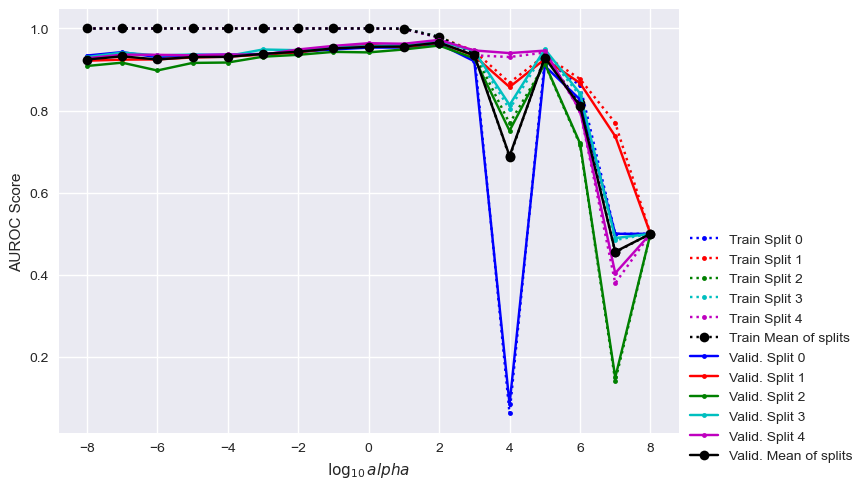

In [90]:
indices = np.argsort(np.asarray(gsearch_results_bert_df['param_my_classifier__alpha'].values))
alpha_vals = np.asarray(gsearch_results_bert_df['param_my_classifier__alpha'].values[indices], dtype=np.float64)
split0_tr_vals = np.asarray((gsearch_results_bert_df['split0_train_score'].values[indices]), dtype=np.float64)
split1_tr_vals = np.asarray((gsearch_results_bert_df['split1_train_score'].values[indices]), dtype=np.float64)
split2_tr_vals = np.asarray((gsearch_results_bert_df['split2_train_score'].values[indices]), dtype=np.float64)
split3_tr_vals = np.asarray((gsearch_results_bert_df['split3_train_score'].values[indices]), dtype=np.float64)
split4_tr_vals = np.asarray((gsearch_results_bert_df['split4_train_score'].values[indices]), dtype=np.float64)
mean_tr_vals = np.asarray((gsearch_results_bert_df['mean_train_score'].values[indices]), dtype=np.float64)
split0_va_vals = np.asarray((gsearch_results_bert_df['split0_test_score'].values[indices]), dtype=np.float64)
split1_va_vals = np.asarray((gsearch_results_bert_df['split1_test_score'].values[indices]), dtype=np.float64)
split2_va_vals = np.asarray((gsearch_results_bert_df['split2_test_score'].values[indices]), dtype=np.float64)
split3_va_vals = np.asarray((gsearch_results_bert_df['split3_test_score'].values[indices]), dtype=np.float64)
split4_va_vals = np.asarray((gsearch_results_bert_df['split4_test_score'].values[indices]), dtype=np.float64)
mean_va_vals = np.asarray((gsearch_results_bert_df['mean_test_score'].values[indices]), dtype=np.float64)

print(alpha_vals)
# print(type(alpha_vals))
# print(np.log(alpha_vals))
plot_curves(alpha_vals, split0_tr_vals, split1_tr_vals, split2_tr_vals, split3_tr_vals, split4_tr_vals,
            mean_tr_vals, split0_va_vals, split1_va_vals, split2_va_vals, split3_va_vals, split4_va_vals,
            mean_va_vals)

In [112]:
import os
filename = 'yproba1_test.txt'
# os.remove(filename)

print(sklearn.metrics.roc_auc_score(y_tr_true_N, best_classifier.predict_proba(x_tr_embeddings_N)[:,1]))
predicted_probas = best_classifier.predict_proba(x_te_embeddings_N)[:,1]

with open(filename, 'a') as f:
    f.write("\n".join(str(num) for num in predicted_probas))


0.9810590277777779


In [109]:
arr = np.loadtxt("yproba1_test.txt")
print(arr)


[0.06054035 0.08743636 0.09175207 0.14382742 0.01222477 0.11158926
 0.05127344 0.09938652 0.03858583 0.92821953 0.27777334 0.30061641
 0.00586281 0.01213034 0.07620942 0.03614313 0.02833629 0.02371727
 0.07387688 0.21925385 0.0508984  0.12997589 0.15433186 0.01381178
 0.11480781 0.1186715  0.01609005 0.10531255 0.00924972 0.02686636
 0.19435781 0.60798357 0.03504938 0.0298418  0.07123337 0.02113192
 0.35498693 0.02159026 0.11462274 0.08847432 0.02204916 0.0153369
 0.16019186 0.11046936 0.1167393  0.01903592 0.33070348 0.09073936
 0.09918404 0.00924972 0.30658634 0.06972047 0.06479596 0.08341868
 0.01503583 0.75900971 0.00622646 0.25246091 0.04955868 0.20591643
 0.38890402 0.08481564 0.12940863 0.01060447 0.04401557 0.01400111
 0.06926995 0.26419384 0.01784882 0.86104462 0.04246925 0.28254564
 0.00281424 0.08784108 0.15524547 0.0971901  0.20429137 0.5306297
 0.07567725 0.01676199 0.13069573 0.07403729 0.03809155 0.10028055
 0.11467603 0.26688498 0.08972049 0.02205135 0.10595969 0.026390

In [107]:
differences = np.square(y_tr_true_N - best_classifier.predict_proba(x_tr_embeddings_N)[:,1])

# print(differences[np.flip(np.argsort(differences))][:8])

for index in np.flip(np.argsort(differences))[:9]:
        print(x_tr_list_of_sentences_N[index])
        print(grid_searcher_bert.predict_proba(x_tr_embeddings_N)[:,1][index])
        print(y_tr_true_N[index])
print(np.flip(np.argsort(differences))[:9])

[array([[-8.94525281e-03,  5.12872915e-07,  2.38611918e-02, ...,
         1.17996865e-05, -8.21498202e-03, -2.08424737e-04],
       [-1.09573677e-02,  1.99374607e-06,  2.30918045e-02, ...,
         1.43097670e-05, -1.01054942e-02, -2.61546920e-04],
       [ 3.17836657e-03,  9.06571796e-07, -8.31558249e-03, ...,
        -5.76898987e-06,  2.94002501e-03,  7.91979128e-05],
       ...,
       [-9.55104353e-03,  1.37364200e-06,  2.59665654e-02, ...,
         1.69836075e-05, -8.71987021e-03, -2.11848710e-04],
       [-2.67865624e-03, -1.13930241e-06,  7.45820536e-03, ...,
         7.90826015e-06, -2.54991864e-03, -6.96793425e-05],
       [-4.69562129e-03,  4.20287279e-07,  1.47019654e-02, ...,
         1.08388299e-05, -4.37763217e-03, -1.19686182e-04]]), array([[ 2.07746402e-01],
       [ 1.84157842e-06],
       [-4.87470231e-01],
       [-9.96041612e-05],
       [ 7.79887050e-03],
       [ 4.91041422e-02],
       [-3.08367796e-01],
       [-4.19341439e-03],
       [-1.13731694e-06],
       